

---



* [INE4105] Industrial Artificial Intelligence @Hanyang University ERICA
* Instructor: Yosep Oh (yosepoh@hanyang.ac.kr)
* Week12: Lab session (Reinforcement Learning: GridWorld)

---



# Step 1: Preliminaries  


In [ ]:
# Install Stable Baseline 3
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 33.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.

In [ ]:
# Import packages
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN

# Step 2: Define the environment

In [ ]:
class GridWorldEnv(gym.Env):
    def __init__(self):
        # Initialize the GridWorld environment
        super(GridWorldEnv, self).__init__()
        self.grid_size = 8  # Define the size of the grid
        self.action_space = spaces.Discrete(4)  # Define the action space: 4 possible actions
        self.observation_space = spaces.Box(low=0, high=self.grid_size-1, shape=(2,), dtype=np.int32)  # Define the observation space
        self.reset()  # Reset the environment

    def step(self, action):
        # Execute the action
        if action == 0:
            self.move_left()
        elif action == 1:
            self.move_up()
        elif action == 2:
            self.move_right()
        elif action == 3:
            self.move_down()

        reward = -1 # Reward is -1 if the agent moves
        done = self.is_done()  # Check if the episode is done
        return np.array([self.x, self.y], dtype=np.int32), reward, done, {}

    def reset(self):
        # Reset the agent's position to the start
        self.x = 0
        self.y = 0
        return np.array([self.x, self.y], dtype=np.int32)

    def move_right(self):
        # Move the agent to the right
        self.y = min(self.y + 1, self.grid_size - 1)

    def move_left(self):
        # Move the agent to the left
        self.y = max(self.y - 1, 0)

    def move_up(self):
        # Move the agent up
        self.x = max(self.x - 1, 0)

    def move_down(self):
        # Move the agent down
        self.x = min(self.x + 1, self.grid_size - 1)

    def is_done(self):
        # Check if the agent has reached the goal
        return self.x == self.grid_size - 1 and self.y == self.grid_size - 1

- GridWorldEnv 클래스: 간단한 GridWorld 환경을 정의합니다. 이 환경은 4x4 그리드로 구성되어 있으며, 에이전트는 좌표 (0, 0)에서 시작하여 (3, 3) 목표 지점에 도달하려고 합니다.
- action_space: 에이전트가 취할 수 있는 4가지 행동(왼쪽, 위, 오른쪽, 아래)을 정의합니다.
- observation_space: 에이전트의 위치를 나타내는 2차원 좌표 (x, y)입니다.
- step 메서드: 주어진 행동을 실행하고, 새로운 상태, 보상, 에피소드 종료 여부를 반환합니다.
- reset 메서드: 에이전트의 위치를 초기화합니다.
- move_ 메서드*: 에이전트의 위치를 업데이트합니다.
- is_done 메서드: 에이전트가 목표 지점에 도달했는지 확인합니다.

# Step 3: Define the agent

In [ ]:
# Initialize the GridWorld environment
env = GridWorldEnv()

# Build a DQN model
model = DQN('MlpPolicy', env, verbose=0, exploration_fraction=0.5, exploration_final_eps=0.01, learning_rate=0.01)

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


- env = GridWorldEnv(): GridWorld 환경을 초기화합니다.
- model = DQN(...): DQN 모델을 초기화합니다.
- 'MlpPolicy': 다층 퍼셉트론(MLP) 정책을 사용합니다.
- env: 앞서 정의한 GridWorld 환경입니다.
- verbose=0: 학습 과정의 출력을 생략합니다.
- exploration_fraction=0.5: 탐험 비율을 50%로 설정합니다. 초기 학습 단계에서 무작위 행동을 많이 취합니다.
- exploration_final_eps=0.01: 탐험 비율의 최종 값을 0.01로 설정합니다. 학습 후반에는 무작위 행동을 거의 하지 않습니다.
- learning_rate=0.01: 학습률을 0.01로 설정합니다.


# Step 4: Training


In [ ]:
# Train the DQN agent
episode_rewards = []  # List to store rewards for each episode
first_episode_path = []  # List to store the path of the first episode
last_episode_path = []  # List to store the path of the last episode

max_steps_per_episode = 50  # Maximum number of steps per episode
num_episodes = 1000  # Total number of episodes

for episode in range(num_episodes):
    obs = env.reset()  # Reset the environment at the start of each episode
    total_rewards = 0  # Initialize total rewards for the episode
    done = False  # Initialize the done flag
    action_count = 0  # Initialize action count for the episode
    episode_path = [tuple(obs)]  # Initialize the path for the episode

    while not done and action_count < max_steps_per_episode:
        action, _ = model.predict(obs, deterministic=False)  # Predict the next action using the DQN model
        obs, reward, done, _ = env.step(action)  # Execute the action in the environment
        total_rewards += reward  # Accumulate the reward
        action_count += 1  # Increment the action count
        episode_path.append(tuple(obs))  # Append the current position to the path
    print(f"Episode: {episode + 1}, Total Reward: {action_count}, Total Reward: {total_rewards}")

    # Store total rewards per episode
    episode_rewards.append(total_rewards)

    # Store the path of the first episode
    if episode == 0:
        first_episode_path = episode_path

    # Store the path of the last episode
    if episode == num_episodes - 1:
        last_episode_path = episode_path

    # Update the model after each episode
    model.learn(total_timesteps=200)

Episode: 1, Total Reward: 50, Total Reward: -50
Episode: 2, Total Reward: 50, Total Reward: -50
Episode: 3, Total Reward: 50, Total Reward: -50
Episode: 4, Total Reward: 50, Total Reward: -50
Episode: 5, Total Reward: 50, Total Reward: -50
Episode: 6, Total Reward: 50, Total Reward: -50
Episode: 7, Total Reward: 50, Total Reward: -50
Episode: 8, Total Reward: 50, Total Reward: -50
Episode: 9, Total Reward: 50, Total Reward: -50
Episode: 10, Total Reward: 50, Total Reward: -50
Episode: 11, Total Reward: 50, Total Reward: -50
Episode: 12, Total Reward: 50, Total Reward: -50
Episode: 13, Total Reward: 50, Total Reward: -50
Episode: 14, Total Reward: 50, Total Reward: -50
Episode: 15, Total Reward: 50, Total Reward: -50
Episode: 16, Total Reward: 50, Total Reward: -50
Episode: 17, Total Reward: 50, Total Reward: -50
Episode: 18, Total Reward: 50, Total Reward: -50
Episode: 19, Total Reward: 50, Total Reward: -50
Episode: 20, Total Reward: 50, Total Reward: -50
Episode: 21, Total Reward: 50

- episode_rewards: 각 에피소드에서 받은 총 보상을 저장하는 리스트입니다.
- first_episode_path: 첫 번째 에피소드에서 에이전트가 이동한 경로를 저장하는 리스트입니다.
- last_episode_path: 마지막 에피소드에서 에이전트가 이동한 경로를 저장하는 리스트입니다.
- max_steps_per_episode = 50: 각 에피소드에서 최대 50 스텝까지만 수행하도록 설정합니다.
- num_episodes = 1000: 총 1000개의 에피소드를 수행합니다.

- obs = env.reset(): 환경을 초기화하고 초기 관측값을 가져옵니다.
- while not done and action_count < max_steps_per_episode: 에피소드가 끝나지 않고 최대 스텝 수를 넘지 않을 때까지 반복합니다.
- action, _ = model.predict(obs, deterministic=False): 현재 상태에서 모델을 사용하여 다음 행동을 예측합니다.
- obs, reward, done, _ = env.step(action): 예측된 행동을 환경에 적용하여 새로운 상태, 보상, 종료 여부를 가져옵니다.
- total_rewards += reward: 총 보상에 현재 보상을 추가합니다.
- action_count += 1: 스텝 수를 증가시킵니다.
- episode_path.append(tuple(obs)): 현재 상태를 경로에 추가합니다.
- episode_rewards.append(total_rewards): 총 보상을 저장합니다.
- if episode == 0: first_episode_path = episode_path: 첫 번째 에피소드의 경로를 저장합니다.
- if episode == num_episodes - 1: last_episode_path = episode_path: 마지막 에피소드의 경로를 저장합니다.
- model.learn(total_timesteps=200): 모델을 업데이트합니다.

# Step 5: Result

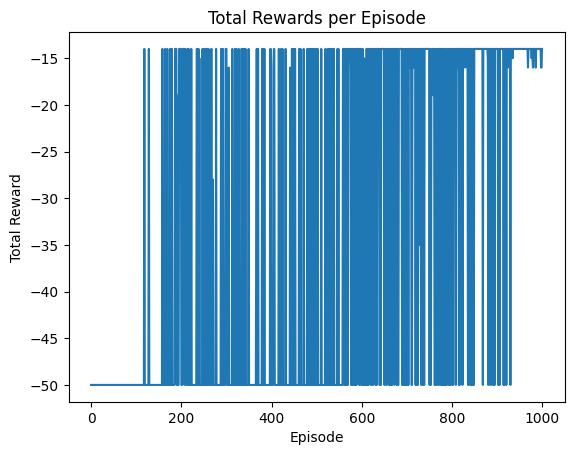

In [ ]:
# Plot the total rewards per episode
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.show()

In [ ]:
# Function to visualize the path of an episode
def plot_episode_path(path, title):
    grid = [[' ' for _ in range(env.grid_size)] for _ in range(env.grid_size)]  # Initialize an empty grid
    grid[0][0] = 'S'  # Mark the start position
    grid[env.grid_size-1][env.grid_size-1] = 'G'  # Mark the goal position
    for (x, y) in path:
        if (x, y) != (0, 0) and (x, y) != (env.grid_size-1, env.grid_size-1):
            grid[x][y] = 'X'  # Mark the path positions

    # Print the grid
    print(title)
    for row in grid:
        print(' '.join(row))
    print()

# Visualize the path of the first and last episode
plot_episode_path(first_episode_path, 'First Episode Path')
plot_episode_path(last_episode_path, 'Last Episode Path')

First Episode Path
S              
X              
X              
X              
X              
X              
X              
X             G

Last Episode Path
S              
X              
X              
X X X X X X X X
              X
              X
              X
              G



In [ ]:
# Install Stable Baseline 3
!pip install stable-baselines3[extra]

# Import packages
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN

class GridWorldEnv(gym.Env):
    def __init__(self):
        # Initialize the GridWorld environment
        super(GridWorldEnv, self).__init__()
        self.grid_size = 8  # Define the size of the grid
        self.action_space = spaces.Discrete(4)  # Define the action space: 4 possible actions
        self.observation_space = spaces.Box(low=0, high=self.grid_size-1, shape=(2,), dtype=np.int32)  # Define the observation space
        self.maze = [
            [0, 0, 1, 1, 1, 0, 0, 0],
            [0, 1, 1, 0, 1, 0, 1, 1],
            [0, 1, 0, 0, 1, 1, 1, 0],
            [0, 0, 0, 1, 1, 0, 0, 0],
            [1, 1, 0, 1, 0, 0, 1, 1],
            [0, 0, 0, 1, 0, 1, 1, 0],
            [0, 1, 1, 1, 0, 0, 1, 0],
            [0, 0, 0, 1, 1, 1, 0, 0]
        ]  # 1 represents walls, 0 represents free space
        self.reset()  # Reset the environment

    def step(self, action):
        # Execute the action
        if action == 0:
            self.move_left()
        elif action == 1:
            self.move_up()
        elif action == 2:
            self.move_right()
        elif action == 3:
            self.move_down()

        reward = -1 # Reward is -1 if the agent moves
        done = self.is_done()  # Check if the episode is done
        return np.array([self.x, self.y], dtype=np.int32), reward, done, {}

    def reset(self):
        # Reset the agent's position to the start
        self.x = 0
        self.y = 0
        return np.array([self.x, self.y], dtype=np.int32)

    def move_right(self):
        # Move the agent to the right
        if self.y < self.grid_size - 1 and self.maze[self.x][self.y + 1] == 0:
            self.y += 1

    def move_left(self):
        # Move the agent to the left
        if self.y > 0 and self.maze[self.x][self.y - 1] == 0:
            self.y -= 1

    def move_up(self):
        # Move the agent up
        if self.x > 0 and self.maze[self.x - 1][self.y] == 0:
            self.x -= 1

    def move_down(self):
        # Move the agent down
        if self.x < self.grid_size - 1 and self.maze[self.x + 1][self.y] == 0:
            self.x += 1

    def is_done(self):
        # Check if the agent has reached the goal
        return self.x == self.grid_size - 1 and self.y == self.grid_size - 1

# Initialize the GridWorld environment
env = GridWorldEnv()

# Build a DQN model
model = DQN('MlpPolicy', env, verbose=0, exploration_fraction=0.5, exploration_final_eps=0.01, learning_rate=0.01)

# Train the DQN agent
episode_rewards = []  # List to store rewards for each episode
first_episode_path = []  # List to store the path of the first episode
last_episode_path = []  # List to store the path of the last episode

max_steps_per_episode = 50  # Maximum number of steps per episode
num_episodes = 1000  # Total number of episodes

for episode in range(num_episodes):
    obs = env.reset()  # Reset the environment at the start of each episode
    total_rewards = 0  # Initialize total rewards for the episode
    done = False  # Initialize the done flag
    action_count = 0  # Initialize action count for the episode
    episode_path = [tuple(obs)]  # Initialize the path for the episode

    while not done and action_count < max_steps_per_episode:
        action, _ = model.predict(obs, deterministic=False)  # Predict the next action using the DQN model
        obs, reward, done, _ = env.step(action)  # Execute the action in the environment
        total_rewards += reward  # Accumulate the reward
        action_count += 1  # Increment the action count
        episode_path.append(tuple(obs))  # Append the current position to the path
    print(f"Episode: {episode + 1}, Total Steps: {action_count}, Total Reward: {total_rewards}")

    # Store total rewards per episode
    episode_rewards.append(total_rewards)

    # Store the path of the first episode
    if episode == 0:
        first_episode_path = episode_path

    # Store the path of the last episode
    if episode == num_episodes - 1:
        last_episode_path = episode_path

    # Update the model after each episode
    model.learn(total_timesteps=200)

# Function to visualize the path of an episode
def plot_episode_path(path, title):
    grid = [[' ' for _ in range(env.grid_size)] for _ in range(env.grid_size)]  # Initialize an empty grid
    grid[0][0] = 'S'  # Mark the start position
    grid[env.grid_size-1][env.grid_size-1] = 'G'  # Mark the goal position
    for (x, y) in path:
        if (x, y) != (0, 0) and (x, y) != (env.grid_size-1, env.grid_size-1):
            grid[x][y] = 'X'  # Mark the path positions

    # Print the grid
    print(title)
    for row in grid:
        print(' '.join(row))
    print()

# Visualize the path of the first and last episode
plot_episode_path(first_episode_path, 'First Episode Path')
plot_episode_path(last_episode_path, 'Last Episode Path')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 39.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Episode: 1, Total Steps: 50, Total Reward: -50
Episode: 2, Total Steps: 50, Total Reward: -50
Episode: 3, Total Steps: 50, Total Reward: -50
Episode: 4, Total Steps: 50, Total Reward: -50
Episode: 5, Total Steps: 50, Total Reward: -50
Episode: 6, Total Steps: 50, Total Reward: -50
Episode: 7, Total Steps: 50, Total Reward: -50
Episode: 8, Total Steps: 50, Total Reward: -50
Episode: 9, Total Steps: 50, Total Reward: -50
Episode: 10, Total Steps: 50, Total Reward: -50
Episode: 11, Total Steps: 50, Total Reward: -50
Episode: 12, Total Steps: 50, Total Reward: -50
Episode: 13, Total Steps: 50, Total Reward: -50
Episode: 14, Total Steps: 50, Total Reward: -50
Episode: 15, Total Steps: 50, Total Reward: -50
Episode: 16, Total Steps: 50, Total Reward: -50
Episode: 17, Total Steps: 50, Total Reward: -50
Episode: 18, Total Steps: 50, Total Reward: -50
Episode: 19, Total Steps: 50, Total Reward: -50
Episode: 20, Total Steps: 50, Total Reward: -50
Episode: 21, Total Steps: 50, Total Reward: -50
E

In [ ]:
class GridWorldEnv(gym.Env):
    def __init__(self):
        # GridWorld 환경 초기화
        super(GridWorldEnv, self).__init__()
        self.grid_size = 8  # 그리드 크기 정의
        self.action_space = spaces.Discrete(4)  # 행동 공간: 4개의 가능한 행동
        self.observation_space = spaces.Box(low=0, high=self.grid_size-1, shape=(2,), dtype=np.int32)  # 관찰 공간 정의
        self.maze = [
            [1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 1, 1, 0, 1, 0, 1],
            [1, 0, 0, 1, 1, 0, 0, 1],
            [1, 1, 0, 0, 1, 0, 1, 1],
            [1, 0, 1, 0, 1, 0, 0, 1],
            [1, 0, 0, 0, 0, 1, 0, 0],
            [1, 1, 1, 1, 1, 1, 1, 1]
        ]  # 1은 벽, 0은 자유 공간
        self.reset()  # 환경 초기화

    def step(self, action):
        # 행동 실행
        if action == 0:
            self.move_left()
        elif action == 1:
            self.move_up()
        elif action == 2:
            self.move_right()
        elif action == 3:
            self.move_down()

        reward = -1  # 에이전트가 움직일 때 보상은 -1
        done = self.is_done()  # 에피소드 종료 여부 확인
        return np.array([self.x, self.y], dtype=np.int32), reward, done, {}

    def reset(self):
        # 에이전트 위치를 시작점으로 초기화
        self.x = 2
        self.y = 0
        return np.array([self.x, self.y], dtype=np.int32)

    def move_right(self):
        # 에이전트를 오른쪽으로 이동
        if self.y < self.grid_size - 1 and self.maze[self.x][self.y + 1] == 0:
            self.y += 1

    def move_left(self):
        # 에이전트를 왼쪽으로 이동
        if self.y > 0 and self.maze[self.x][self.y - 1] == 0:
            self.y -= 1

    def move_up(self):
        # 에이전트를 위로 이동
        if self.x > 0 and self.maze[self.x - 1][self.y] == 0:
            self.x -= 1

    def move_down(self):
        # 에이전트를 아래로 이동
        if self.x < self.grid_size - 1 and self.maze[self.x + 1][self.y] == 0:
            self.x += 1

    def is_done(self):
        # 에이전트가 목표에 도달했는지 확인
        return self.x == 6 and self.y == 7

# GridWorld 환경 초기화
env = GridWorldEnv()

# DQN 모델 구축
model = DQN('MlpPolicy', env, verbose=0, exploration_fraction=0.5, exploration_final_eps=0.01, learning_rate=0.01)

# DQN 에이전트 훈련
episode_rewards = []  # 각 에피소드의 보상을 저장할 리스트
first_episode_path = []  # 첫 번째 에피소드의 경로를 저장할 리스트
last_episode_path = []  # 마지막 에피소드의 경로를 저장할 리스트

max_steps_per_episode = 300  # 에피소드당 최대 단계 수
num_episodes = 5000  # 총 에피소드 수

for episode in range(num_episodes):
    obs = env.reset()  # 각 에피소드 시작 시 환경 초기화
    total_rewards = 0  # 에피소드 동안의 총 보상 초기화
    done = False  # done 플래그 초기화
    action_count = 0  # 에피소드 동안의 행동 수 초기화
    episode_path = [tuple(obs)]  # 에피소드 경로 초기화

    while not done and action_count < max_steps_per_episode:
        action, _ = model.predict(obs, deterministic=False)  # DQN 모델을 사용하여 다음 행동 예측
        obs, reward, done, _ = env.step(action)  # 환경에서 행동 실행
        total_rewards += reward  # 보상 누적
        action_count += 1  # 행동 수 증가
        episode_path.append(tuple(obs))  # 현재 위치를 경로에 추가
    print(f"Episode: {episode + 1}, Total Steps: {action_count}, Total Reward: {total_rewards}")

    # 각 에피소드의 총 보상 저장
    episode_rewards.append(total_rewards)

    # 첫 번째 에피소드의 경로 저장
    if episode == 0:
        first_episode_path = episode_path

    # 마지막 에피소드의 경로 저장
    if episode == num_episodes - 1:
        last_episode_path = episode_path

    # 각 에피소드 후 모델 업데이트
    model.learn(total_timesteps=200)

# 에피소드 경로를 시각화하는 함수
def plot_episode_path(path, title):
    grid = [[' ' for _ in range(env.grid_size)] for _ in range(env.grid_size)]  # 빈 그리드 초기화
    grid[2][0] = 'S'  # 시작 위치 표시
    grid[6][7] = 'G'  # 목표 위치 표시
    for (x, y) in path:
        if (x, y) != (2, 0) and (x, y) != (6, 7):
            grid[x][y] = 'X'  # 경로 위치 표시

    # 그리드 출력
    print(title)
    for row in grid:
        print(' '.join(row))
    print()

# 첫 번째와 마지막 에피소드의 경로 시각화
plot_episode_path(first_episode_path, 'First Episode Path')
plot_episode_path(last_episode_path, 'Last Episode Path')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Episode: 21, Total Steps: 300, Total Reward: -300
Episode: 22, Total Steps: 300, Total Reward: -300
Episode: 23, Total Steps: 300, Total Reward: -300
Episode: 24, Total Steps: 300, Total Reward: -300
Episode: 25, Total Steps: 300, Total Reward: -300
Episode: 26, Total Steps: 300, Total Reward: -300
Episode: 27, Total Steps: 300, Total Reward: -300
Episode: 28, Total Steps: 300, Total Reward: -300
Episode: 29, Total Steps: 300, Total Reward: -300
Episode: 30, Total Steps: 300, Total Reward: -300
Episode: 31, Total Steps: 300, Total Reward: -300
Episode: 32, Total Steps: 300, Total Reward: -300
Episode: 33, Total Steps: 300, Total Reward: -300
Episode: 34, Total Steps: 300, Total Reward: -300
Episode: 35, Total Steps: 300, Total Reward: -300
Episode: 36, Total Steps: 300, Total Reward: -300
Episode: 37, Total Steps: 300, Total Reward: -300
Episode: 38, Total Steps: 300, Total Reward: -300
Episode: 39, Total Steps: 300, Total Reward: -300
Episode: 40, T

In [ ]:
!pip install gymnasium

In [ ]:
import gym
from gym import spaces
import numpy as np
from stable_baselines3 import DQN
import matplotlib.pyplot as plt

class GridWorldEnv(gym.Env):
    def __init__(self):
        super(GridWorldEnv, self).__init__()
        self.grid_size = 8
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=self.grid_size-1, shape=(2,), dtype=np.int32)
        self.maze = [
            [1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 1, 1, 0, 1, 0, 1],
            [1, 0, 0, 1, 1, 0, 0, 1],
            [1, 1, 0, 0, 1, 0, 1, 1],
            [1, 0, 1, 0, 1, 0, 0, 1],
            [1, 0, 0, 0, 0, 1, 0, 0],
            [1, 1, 1, 1, 1, 1, 1, 1]
        ]
        self.reset()

    def step(self, action):
        if action == 0:
            self.move_left()
        elif action == 1:
            self.move_up()
        elif action == 2:
            self.move_right()
        elif action == 3:
            self.move_down()

        done = self.is_done()
        reward = -1 if not done else 100
        return np.array([self.x, self.y], dtype=np.int32), reward, done, {}

    def reset(self):
        self.x = 2
        self.y = 0
        return np.array([self.x, self.y], dtype=np.int32)

    def move_right(self):
        if self.y < self.grid_size - 1 and self.maze[self.x][self.y + 1] == 0:
            self.y += 1

    def move_left(self):
        if self.y > 0 and self.maze[self.x][self.y - 1] == 0:
            self.y -= 1

    def move_up(self):
        if self.x > 0 and self.maze[self.x - 1][self.y] == 0:
            self.x -= 1

    def move_down(self):
        if self.x < self.grid_size - 1 and self.maze[self.x + 1][self.y] == 0:
            self.x += 1

    def is_done(self):
        return self.x == 6 and self.y == 7

env = GridWorldEnv()
model = DQN('MlpPolicy', env, verbose=0, exploration_fraction=0.2, exploration_final_eps=0.02, learning_rate=0.005)

episode_rewards = []
first_episode_path = []
last_episode_path = []

max_steps_per_episode = 200
num_episodes = 1500

for episode in range(num_episodes):
    obs = env.reset()
    total_rewards = 0
    done = False
    action_count = 0
    episode_path = [tuple(obs)]

    while not done and action_count < max_steps_per_episode:
        action, _ = model.predict(obs, deterministic=False)
        obs, reward, done, _ = env.step(action)
        total_rewards += reward
        action_count += 1
        episode_path.append(tuple(obs))

    episode_rewards.append(total_rewards)

    if episode == 0:
        first_episode_path = episode_path

    if episode == num_episodes - 1:
        last_episode_path = episode_path

    model.learn(total_timesteps=500, reset_num_timesteps=False)

def plot_episode_path(path, title):
    grid = [[' ' for _ in range(env.grid_size)] for _ in range(env.grid_size)]
    grid[2][0] = 'S'
    grid[6][7] = 'G'
    for (x, y) in path:
        if (x, y) != (2, 0) and (x, y) != (6, 7):
            grid[x][y] = 'X'

    print(title)
    for row in grid:
        print(' '.join(row))
    print()

plot_episode_path(first_episode_path, 'First Episode Path')
plot_episode_path(last_episode_path, 'Last Episode Path')

plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()


KeyboardInterrupt: 

In [ ]:
import gym
from gym import spaces
import numpy as np
from stable_baselines3 import DQN
import matplotlib.pyplot as plt

class GridWorldEnv(gym.Env):
    def __init__(self):
        super(GridWorldEnv, self).__init__()
        self.grid_size = 8
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=self.grid_size-1, shape=(2,), dtype=np.int32)
        self.maze = [
            [1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 1, 1, 0, 1, 0, 1],
            [1, 0, 0, 1, 1, 0, 0, 1],
            [1, 1, 0, 0, 1, 0, 1, 1],
            [1, 0, 1, 0, 1, 0, 0, 1],
            [1, 0, 0, 0, 0, 1, 0, 0],
            [1, 1, 1, 1, 1, 1, 1, 1]
        ]
        self.reset()

    def step(self, action):
        prev_x, prev_y = self.x, self.y

        if action == 0:
            self.move_left()
        elif action == 1:
            self.move_up()
        elif action == 2:
            self.move_right()
        elif action == 3:
            self.move_down()

        done = self.is_done()
        if done:
            reward = 100
        elif (self.x, self.y) == (prev_x, prev_y):
            reward = -10  # 벽에 부딪히면 패널티
        else:
            reward = -1  # 이동마다 패널티

        return np.array([self.x, self.y], dtype=np.int32), reward, done, {}

    def reset(self):
        self.x = 2
        self.y = 0
        return np.array([self.x, self.y], dtype=np.int32)

    def move_right(self):
        if self.y < self.grid_size - 1 and self.maze[self.x][self.y + 1] == 0:
            self.y += 1

    def move_left(self):
        if self.y > 0 and self.maze[self.x][self.y - 1] == 0:
            self.y -= 1

    def move_up(self):
        if self.x > 0 and self.maze[self.x - 1][self.y] == 0:
            self.x -= 1

    def move_down(self):
        if self.x < self.grid_size - 1 and self.maze[self.x + 1][self.y] == 0:
            self.x += 1

    def is_done(self):
        return self.x == 6 and self.y == 7

env = GridWorldEnv()
model = DQN('MlpPolicy', env, verbose=0, exploration_fraction=0.4, exploration_final_eps=0.1, learning_rate=0.001)

episode_rewards = []
first_episode_path = []
last_episode_path = []

max_steps_per_episode = 200
num_episodes = 3000

for episode in range(num_episodes):
    obs = env.reset()
    total_rewards = 0
    done = False
    action_count = 0
    episode_path = [tuple(obs)]

    while not done and action_count < max_steps_per_episode:
        action, _ = model.predict(obs, deterministic=False)
        obs, reward, done, _ = env.step(action)
        total_rewards += reward
        action_count += 1
        episode_path.append(tuple(obs))

    episode_rewards.append(total_rewards)

    if episode == 0:
        first_episode_path = episode_path

    if episode == num_episodes - 1:
        last_episode_path = episode_path

    model.learn(total_timesteps=300000, reset_num_timesteps=False)

def plot_episode_path(path, title):
    grid = [[' ' for _ in range(env.grid_size)] for _ in range(env.grid_size)]
    grid[2][0] = 'S'
    grid[6][7] = 'G'
    for (x, y) in path:
        if (x, y) != (2, 0) and (x, y) != (6, 7):
            grid[x][y] = 'X'

    print(title)
    for row in grid:
        print(' '.join(row))
    print()

plot_episode_path(first_episode_path, 'First Episode Path')
plot_episode_path(last_episode_path, 'Last Episode Path')

plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()


KeyboardInterrupt: 

In [ ]:
!pip install gymnasium

In [ ]:
pip install gym tensorflow tensorboard

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | -15.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3176     |
|    fps              | 729      |
|    time_elapsed     | 382      |
|    total_timesteps  | 278991   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.33e-05 |
|    n_updates        | 69722    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | -15.8    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3180     |
|    fps              | 729      |
|    time_elapsed     | 382      |
|    total_timesteps  | 279052   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.09e-05 |
|    n_updates        | 69737    |
-------------------

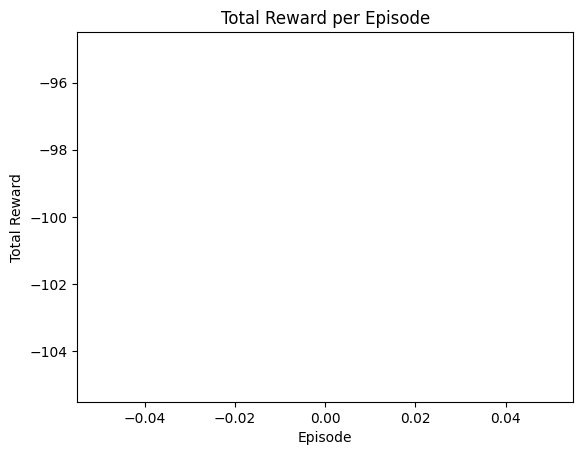

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN


class CustomMazeEnv(gym.Env):
    def __init__(self, maze):
        super(CustomMazeEnv, self).__init__()

        self.maze = np.array(maze)
        self.size = self.maze.shape[0]
        self.start_pos = (2, 0)  # 시작 위치 (내부 좌표)
        self.end_pos = (6, 7)    # 목표 위치 (내부 좌표)

        self.action_space = gym.spaces.Discrete(4)  # 북, 남, 서, 동
        self.observation_space = gym.spaces.Discrete(self.size * self.size)

        self.reset()

    def reset(self):
        self.agent_pos = self.start_pos
        self.state = self._pos_to_state(self.agent_pos)
        return self.state

    def _pos_to_state(self, pos):
        return pos[0] * self.size + pos[1]

    def step(self, action):
        next_pos = np.array(self.agent_pos)

        if action == 0 and self.agent_pos[0] > 0:  # 북
            next_pos[0] -= 1
        elif action == 1 and self.agent_pos[0] < self.size - 1:  # 남
            next_pos[0] += 1
        elif action == 2 and self.agent_pos[1] > 0:  # 서
            next_pos[1] -= 1
        elif action == 3 and self.agent_pos[1] < self.size - 1:  # 동
            next_pos[1] += 1

        # 에이전트가 이동할 수 있는 길인지 확인
        if self.maze[tuple(next_pos)] == 1:
            self.agent_pos = tuple(next_pos)

        self.state = self._pos_to_state(self.agent_pos)
        reward = -1  # 각 단계마다 보상 -1
        done = self.agent_pos == self.end_pos

        return self.state, reward, done, {}

    def render(self, mode='human'):
        maze_copy = np.array(self.maze)  # 미로의 복사본을 만듭니다.
        maze_copy[self.agent_pos] = 2  # 에이전트의 위치를 2로 표시합니다.

        plt.figure(figsize=(8, 8))
        plt.imshow(maze_copy, cmap='gray', origin='upper')

        # 에이전트의 위치를 표시합니다.
        plt.text(self.agent_pos[1], self.agent_pos[0], 'A', ha='center', va='center', fontsize=12, color='red')

        # 목표 위치를 표시합니다.
        plt.text(self.end_pos[1], self.end_pos[0], 'G', ha='center', va='center', fontsize=12, color='blue')

        # 미로의 경계선을 그립니다.
        for i in range(self.size + 1):
            plt.axhline(i - 0.5, color='black', linewidth=2)
            plt.axvline(i - 0.5, color='black', linewidth=2)

        plt.xticks([])
        plt.yticks([])
        plt.title('Maze')
        plt.show()


# 미로 정의
maze = [
    [0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 1., 1., 1., 1., 1., 1., 0.],
    [1., 1., 0., 0., 1., 0., 1., 0.],
    [0., 1., 1., 0., 0., 1., 1., 0.],
    [0., 0., 1., 1., 0., 1., 0., 0.],
    [0., 1., 0., 1., 0., 1., 1., 0.],
    [0., 1., 1., 1., 1., 0., 1., 1.],
    [0., 0., 0., 0., 0., 0., 0., 0.]
]

# 환경 생성
env = CustomMazeEnv(maze)

# DQN 모델 생성 및 학습
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=300000)

# 경로를 저장할 리스트
first_episode_path = []
last_episode_path = []

# 첫 번째 에피소드 기록
obs = env.reset()
first_episode_path.append(env.agent_pos)
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, _ = env.step(action)
    first_episode_path.append(env.agent_pos)
    if dones:
        break

# 학습된 모델 테스트 및 마지막 에피소드 기록
obs = env.reset()
last_episode_path.append(env.agent_pos)
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, _ = env.step(action)
    last_episode_path.append(env.agent_pos)
    if dones:
        break

# 경로 출력 함수
def print_path(maze, path, title):
    path_set = set(path)
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if (i, j) == env.start_pos:
                print('S', end=' ')
            elif (i, j) == env.end_pos:
                print('G', end=' ')
            elif (i, j) in path_set:
                print('X', end=' ')
            else:
                print(' ', end=' ')
        print()
    print(title)
    print()

# 첫 번째 에피소드 경로 출력
print("First Episode Path")
print_path(maze, first_episode_path, "First Episode Path")

# 마지막 에피소드 경로 출력
print("Last Episode Path")
print_path(maze, last_episode_path, "Last Episode Path")



# 각 에피소드의 리워드 그래프 시각화
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()



In [ ]:
tensorboard --logdir ./dqn_maze_tensorboard/

SyntaxError: invalid syntax (<ipython-input-6-9d31e5dc4fb0>, line 1)

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv

class CustomMazeEnv(gym.Env):
    def __init__(self, maze):
        super(CustomMazeEnv, self).__init__()

        self.maze = np.array(maze)
        self.size = self.maze.shape[0]
        self.start_pos = (0, 0)  # 시작 위치
        self.end_pos = (5, 5)    # 목표 위치

        self.action_space = gym.spaces.Discrete(4)  # 북, 남, 서, 동
        self.observation_space = gym.spaces.Box(low=np.array([0, 0]), high=np.array([self.size - 1, self.size - 1]), dtype=np.int32)

        self.reset()

    def reset(self):
        self.agent_pos = self.start_pos
        return np.array(self.agent_pos, dtype=np.int32)

    def step(self, action):
        next_pos = np.array(self.agent_pos)

        if action == 0 and self.agent_pos[0] > 0:  # 북
            next_pos[0] -= 1
        elif action == 1 and self.agent_pos[0] < self.size - 1:  # 남
            next_pos[0] += 1
        elif action == 2 and self.agent_pos[1] > 0:  # 서
            next_pos[1] -= 1
        elif action == 3 and self.agent_pos[1] < self.size - 1:  # 동
            next_pos[1] += 1

        # 에이전트가 이동할 수 있는 길인지 확인
        if self.maze[tuple(next_pos)] == 0 or tuple(next_pos) == self.end_pos:
            self.agent_pos = tuple(next_pos)

        reward = -1  # 각 단계마다 보상 -1
        done = False

        if self.agent_pos == self.end_pos:
            reward = 100  # 목표에 도달하면 보상 100
            done = True
        elif self.maze[self.agent_pos] == 1:
            reward = -100  # 함정에 빠지면 보상 -100
            done = True

        return np.array(self.agent_pos, dtype=np.int32), reward, done, {}

    def render(self, mode='human'):
        maze_copy = np.array(self.maze, dtype=np.int32)  # 미로의 복사본을 만듭니다.
        maze_copy[self.agent_pos] = 2  # 에이전트의 위치를 2로 표시합니다.

        plt.figure(figsize=(6, 6))
        plt.imshow(maze_copy, cmap='gray', origin='upper')

        # 에이전트의 위치를 표시합니다.
        plt.text(self.agent_pos[1], self.agent_pos[0], 'A', ha='center', va='center', fontsize=12, color='red')

        # 목표 위치를 표시합니다.
        plt.text(self.end_pos[1], self.end_pos[0], 'G', ha='center', va='center', fontsize=12, color='blue')

        # 미로의 경계선을 그립니다.
        for i in range(self.size + 1):
            plt.axhline(i - 0.5, color='black', linewidth=2)
            plt.axvline(i - 0.5, color='black', linewidth=2)

        plt.xticks([])
        plt.yticks([])
        plt.title('Maze')
        plt.show()


# 미로 정의
maze = [
    [0, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0],
]

# 환경 생성
env = DummyVecEnv([lambda: Monitor(CustomMazeEnv(maze))])

# TensorBoard를 위한 평가 콜백 설정
eval_callback = EvalCallback(env, best_model_save_path='./logs/best_model',
                             log_path='./logs/', eval_freq=500,
                             deterministic=True, render=False)

# DQN 모델 생성 및 학습
model = DQN('MlpPolicy', env, verbose=1, tensorboard_log="./dqn_maze_tensorboard/")
model.learn(total_timesteps=300000, callback=eval_callback)

# 경로를 저장할 리스트
first_episode_path = []
last_episode_path = []

# 첫 번째 에피소드 기록
obs = env.reset()
first_episode_path.append((0, 0))
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, _ = env.step(action)
    first_episode_path.append((env.envs[0].envs[0].agent_pos))
    if dones:
        break

# 학습된 모델 테스트 및 마지막 에피소드 기록
obs = env.reset()
last_episode_path.append((0, 0))
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, _ = env.step(action)
    last_episode_path.append((env.envs[0].envs[0].agent_pos))
    if dones:
        break

# 경로 출력 함수
def print_path(maze, path, title):
    path_set = set(path)
    for i in range(len(maze)):
        for j in range(len(maze[i])):
            if (i, j) == (0, 0):
                print('S', end=' ')
            elif (i, j) == (5, 5):
                print('G', end=' ')
            elif (i, j) in path_set:
                print('X', end=' ')
            elif maze[i][j] == 1:
                print('F', end=' ')
            else:
                print(' ', end=' ')
        print()
    print(title)
    print()

# 첫 번째 에피소드 경로 출력
print("First Episode Path")
print_path(maze, first_episode_path, "First Episode Path")

# 마지막 에피소드 경로 출력
print("Last Episode Path")
print_path(maze, last_episode_path, "Last Episode Path")


Using cuda device


AssertionError: The algorithm only supports (<class 'gymnasium.spaces.discrete.Discrete'>,) as action spaces but Discrete(4) was provided

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import gym
from gym import spaces
from collections import deque
import random
import datetime

class MazeEnv(gym.Env):
    def __init__(self):
        super(MazeEnv, self).__init__()
        self.maze = [
            [0, 0, 0, 0, 0, 1],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 1, 0],
        ]
        self.start = (0, 0)
        self.goal = (5, 5)
        self.state = self.start

        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=1, shape=(6, 6), dtype=np.int32)

    def reset(self):
        self.state = self.start
        return self._get_obs()

    def step(self, action):
        x, y = self.state
        if action == 0:   # N
            x -= 1
        elif action == 1: # E
            y += 1
        elif action == 2: # S
            x += 1
        elif action == 3: # W
            y -= 1

        new_state = (x, y)
        if x < 0 or x >= 6 or y < 0 or y >= 6 or self.maze[x][y] == 1:
            return self._get_obs(), -100, True, {}

        self.state = new_state
        reward = -1
        done = False
        if new_state == self.goal:
            reward = 100
            done = True

        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        obs = np.zeros((6, 6), dtype=np.int32)
        x, y = self.state
        obs[x, y] = 1
        return obs

    def render(self):
        maze = np.array(self.maze)
        x, y = self.state
        maze[x, y] = 2
        print(maze)

env = MazeEnv()

class DQNAgent:
    def __init__(self, state_shape, action_size):
        self.state_shape = state_shape
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

        self.log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        self.tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=self.log_dir, histogram_freq=1)

    def _build_model(self):
        model = keras.Sequential()
        model.add(layers.Flatten(input_shape=self.state_shape))
        model.add(layers.Dense(24, activation='relu'))
        model.add(layers.Dense(24, activation='relu'))
        model.add(layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0, callbacks=[self.tensorboard_callback])
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

state_shape = (6, 6)
action_size = env.action_space.n
agent = DQNAgent(state_shape, action_size)

done = False
batch_size = 32
EPISODES = 1000

for e in range(EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, 6, 6])
    for time in range(500):
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, 6, 6])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print(f"Episode: {e}/{EPISODES}, score: {time}, e: {agent.epsilon:.2}")
            break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

agent.save("dqn_maze.h5")

# Start TensorBoard in the background
%load_ext tensorboard
%tensorboard --logdir logs/fit


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 25ms/step
Episode: 83/1000, score: 2, e: 0.5
1/1 [==============================] - 0s 24ms/step
Episode: 84/1000, score: 1, e: 0.49
1/1 [==============================] - 0s 26ms/step
Episode: 85/1000, score: 1, e: 0.49
1/1 [==============================] - 0s 20ms/step
Episode: 86/1000, score: 8, e: 0.47
1/1 [==============================] - 0s 21ms/step
Episode: 87/1000, score: 3, e: 0.46
1/1 [==============================] - 0s 18ms/step
Episode: 88/1000, score: 1, e: 0.46
1/1 [==============================] - 0s 18ms/step
Episode: 89/1000, score: 4, e: 0.45
Episode: 90/1000, score: 0, e: 0.45
1/1 [==============================] - 0s 17ms/step
Episode: 91/1000, score: 3, e: 0.45
Episode: 92/1000, score: 0, e: 0.45
1/1 [==============================] - 0s 25ms/step
Episode: 93/1000, score: 8, e: 0.43
Episode: 94/1000, score: 0, e: 0.43
Episode: 95/1000, score: 0, e: 0.43
Episode: 96/1000, score: 0, e

KeyboardInterrupt: 

In [ ]:
# Install Stable Baseline 3
!pip install stable-baselines3[extra]

In [ ]:
pip install gymnasium

In [ ]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import configure
import tensorflow as tf
import os
from stable_baselines3.common.monitor import Monitor

class TensorboardCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(TensorboardCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        self.logger.record('reward', self.locals['rewards'])
        return True

class MazeEnv(gym.Env):
    def __init__(self):
        super(MazeEnv, self).__init__()
        self.grid_size = 6
        self.start_state = (0, 0)
        self.goal_state = (5, 5)
        self.current_state = self.start_state
        self.previous_state = self.current_state
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=1, shape=(self.grid_size, self.grid_size), dtype=np.float32)

        self.maze = np.array([
            [0, 0, 0, 0, 0, 1],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 1, 0],
        ])

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_state = self.start_state
        self.previous_state = self.current_state
        return self._get_observation(), {}

    def _get_observation(self):
        obs = np.zeros((self.grid_size, self.grid_size))
        obs[self.current_state] = 1
        return obs

    def step(self, action):
        x, y = self.current_state
        if action == 0:
            y -= 1
        elif action == 1:
            x -= 1
        elif action == 2:
            y += 1
        elif action == 3:
            x += 1

        new_state = (x, y)
        if x < 0 or x >= self.grid_size or y < 0 or y >= self.grid_size or self.maze[new_state] == 1:
            new_state = self.current_state

        self.previous_state = self.current_state
        self.current_state = new_state

        reward = -1
        done = False

        if new_state == self.goal_state:
            reward = 100
            done = True
        elif new_state == self.previous_state:
            reward = -10
        elif self.maze[new_state] == 1:
            done = True

        return self._get_observation(), reward, done, {}

    def render(self):
        plt.clf()
        plt.imshow(self.maze, cmap='gray_r')
        plt.scatter(self.current_state[1], self.current_state[0], c='red', marker='o')
        plt.scatter(self.goal_state[1], self.goal_state[0], c='blue', marker='x')
        plt.pause(0.1)
        plt.draw()

env = MazeEnv()

log_dir = "./dqn_maze_tensorboard/"
os.makedirs(log_dir, exist_ok=True)

model = DQN('MlpPolicy', env, verbose=0, tensorboard_log=log_dir, exploration_fraction=0.4, exploration_final_eps=0.05, learning_rate=0.0001)
model.learn(total_timesteps=100000, callback=TensorboardCallback())
obs, _ = env.reset()
cumulative_reward = 0
steps = 0
path = []

done = False
while not (done and reward == 100):
    action = model.predict(obs, deterministic=True)[0]
    obs, reward, done, _ = env.step(action)
    cumulative_reward += reward
    steps += 1
    path.append(env.current_state)
    print(f"Action: {action}, State: {env.current_state}, Reward: {reward}, Done: {done}")
    print(f"Total steps: {steps}, Cumulative reward: {cumulative_reward}")
    print(f"Path: {path}")
    env.render()
    if done:
        print("Goal reached!")
        print(f"Total steps: {steps}, Cumulative reward: {cumulative_reward}")
        print(f"Path: {path}")

plt.close()

model.learn(total_timesteps=200000, callback=TensorboardCallback())
obs, _ = env.reset()
cumulative_reward = 0
steps = 0
path = []

done = False
while not (done and reward == 100):
    action = model.predict(obs, deterministic=True)[0]
    obs, reward, done, _ = env.step(action)
    cumulative_reward += reward
    steps += 1
    path.append(env.current_state)
    print(f"Action: {action}, State: {env.current_state}, Reward: {reward}, Done: {done}")
    print(f"Total steps: {steps}, Cumulative reward: {cumulative_reward}")
    print(f"Path: {path}")
    env.render()
    if done:
        print("Goal reached!")
        print(f"Total steps: {steps}, Cumulative reward: {cumulative_reward}")
        print(f"Path: {path}")

plt.close()

model.learn(total_timesteps=300000, callback=TensorboardCallback())
obs, _ = env.reset()
cumulative_reward = 0
steps = 0
path = []

done = False
while not (done and reward == 100):
    action = model.predict(obs, deterministic=True)[0]
    obs, reward, done, _ = env.step(action)
    cumulative_reward += reward
    steps += 1
    path.append(env.current_state)
    print(f"Action: {action}, State: {env.current_state}, Reward: {reward}, Done: {done}")
    print(f"Total steps: {steps}, Cumulative reward: {cumulative_reward}")
    print(f"Path: {path}")
    env.render()
    if done:
        print("Goal reached!")
        print(f"Total steps: {steps}, Cumulative reward: {cumulative_reward}")
        print(f"Path: {path}")

plt.close()


ValueError: not enough values to unpack (expected 5, got 4)